# Lead Scoring Case Study

### Problem Statement

An education company, X Education, sells online courses to professionals. Many interested professionals visit their website, and some provide their contact information, becoming leads. However, only 30% of these leads convert into paying customers. The company wants to improve this by identifying 'Hot Leads'—those most likely to convert. 

They need you to create a model that scores leads, helping the sales team focus on the best prospects to increase the conversion rate to about 80%.

In [425]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve,precision_score,recall_score

In [426]:
# supress warnings

import warnings
warnings.filterwarnings("ignore")

In [427]:
# Set the maximum number of columns displayed in a pandas DataFrame to unlimited
pd.set_option("display.max_columns", None)

# Set the display option to show all rows
pd.set_option("display.max_rows", None)

In [428]:
# importing the file

lead=pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [429]:
# checking the shape of the DataFrame
lead.shape

(9240, 37)

In [430]:
# basic info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Preprocessing

In [431]:
# Treating "Select" as null value

lead.replace("Select", np.nan, inplace=True)

         #or
#lead = lead.applymap(lambda x: np.nan if x == "Select" else x)


In [432]:
# checking for null values in percentages
round(lead.isnull().sum()/len(lead)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [433]:
# Setting a cutoff of 30% and dropping columns accordingly
drop_col=['Specialization',"How did you hear about X Education",'Tags','Lead Quality','Lead Profile', 
          'City',"Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score",
          "Asymmetrique Profile Score"]

lead=lead.drop(columns=drop_col)

In [434]:
# checking for null values in percentages again

round(lead.isnull().sum()/len(lead)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### Inspecting "Country" column

In [435]:
lead["Country"].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [436]:
# Including only India and USA; other countries are labeled 'Others' due to < 1% contribution.

lead["Country"]=lead["Country"].apply(lambda x: "Others" if x not in ["India","United States"] else x)

In [437]:
# checking "Country" column again

lead["Country"].value_counts()

India            6492
Others           2679
United States      69
Name: Country, dtype: int64

#### Inspecting "What is your current occupation" column

In [438]:
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [439]:
# !pip install missingno

In [440]:
# importing
import missingno as msno

<Axes: >

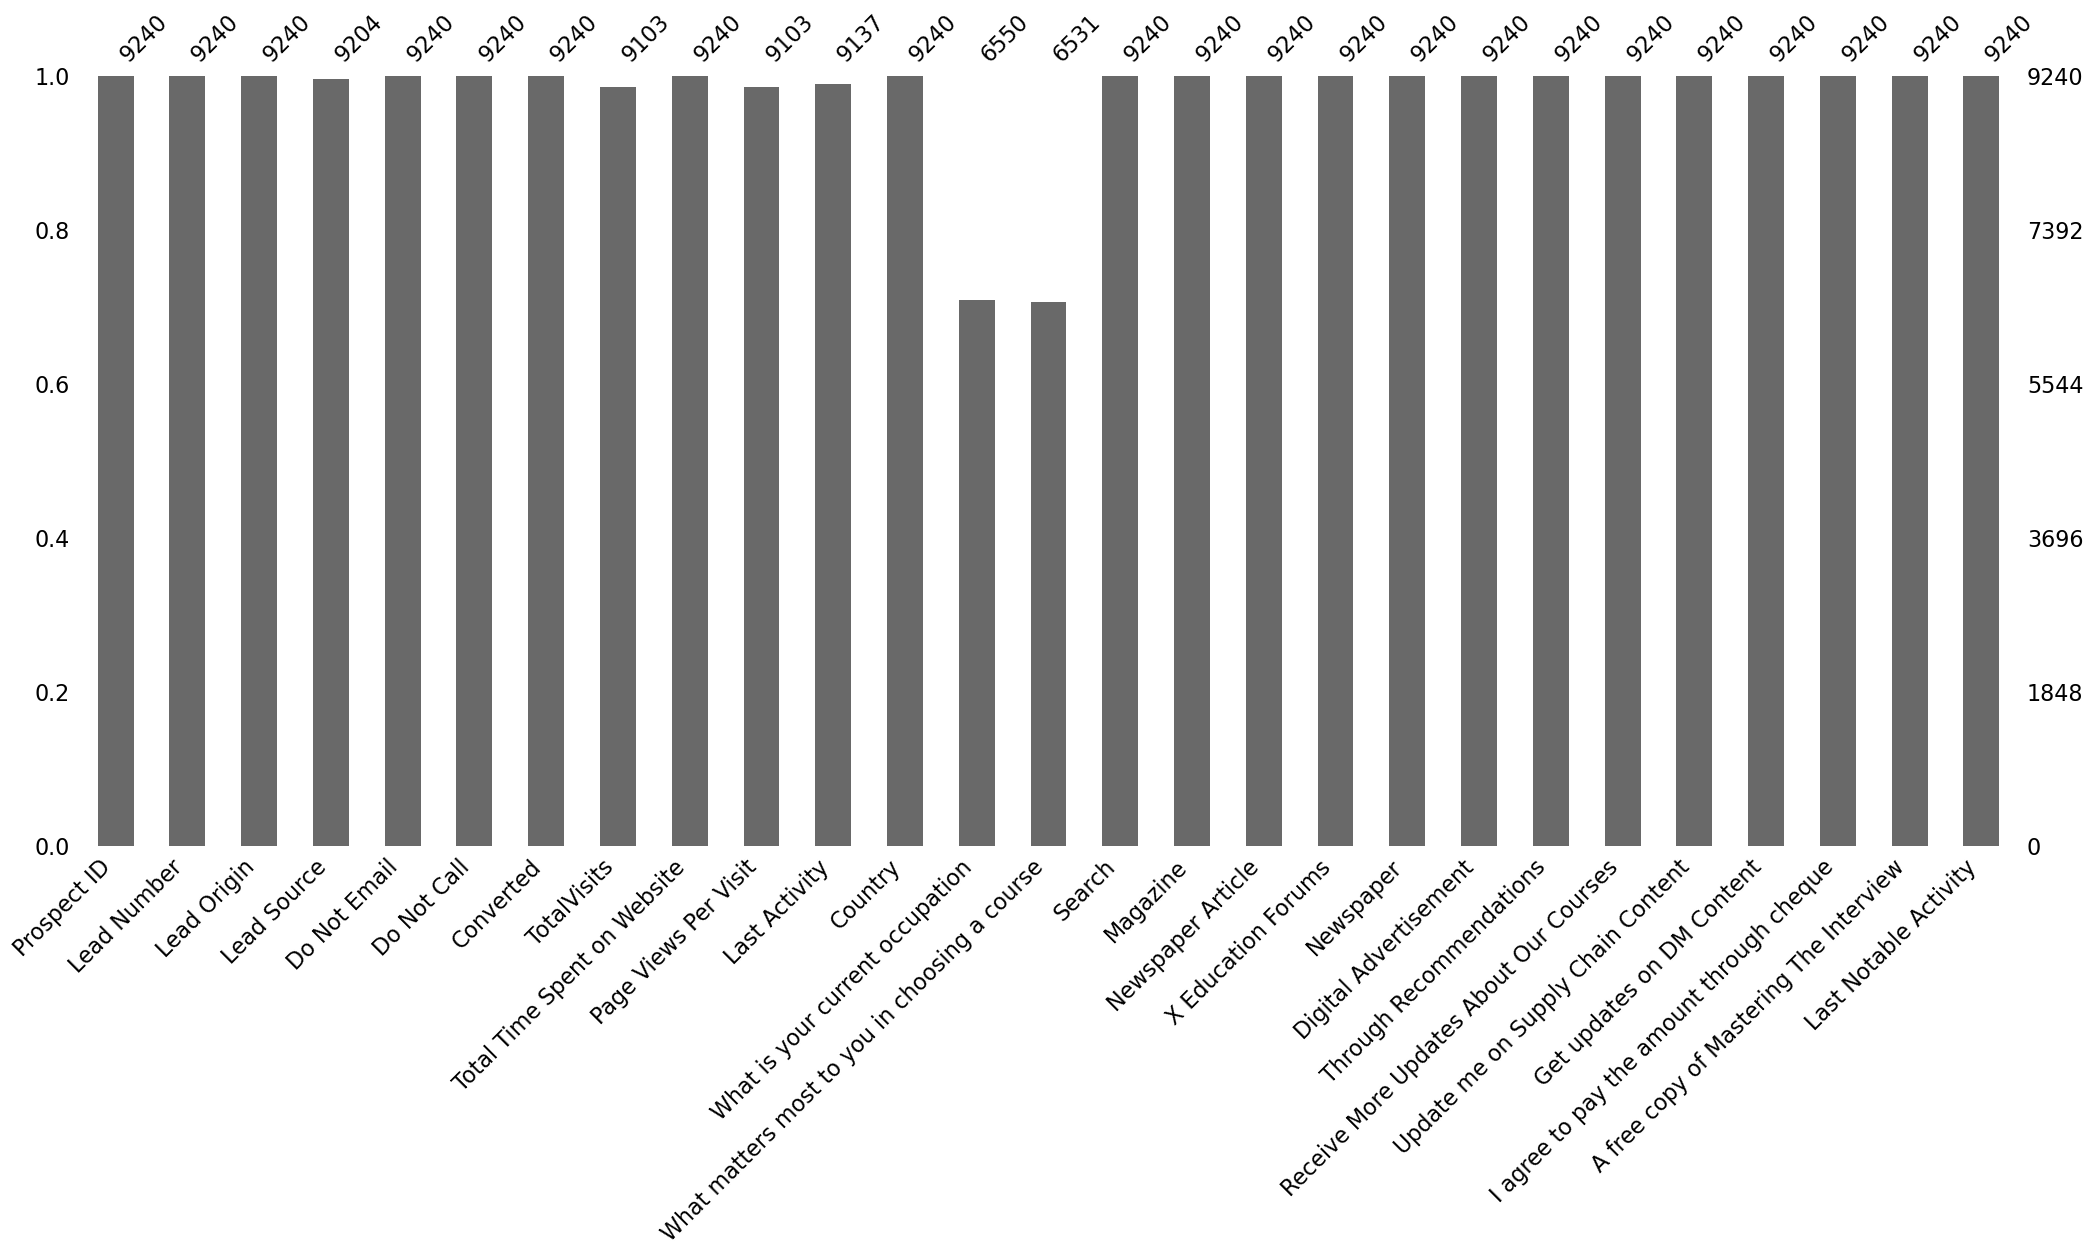

In [441]:
# visulaising missing value count in bar chart
msno.bar(lead)

In [442]:
sorted_lead=lead.sort_values(by="What is your current occupation")

<Axes: >

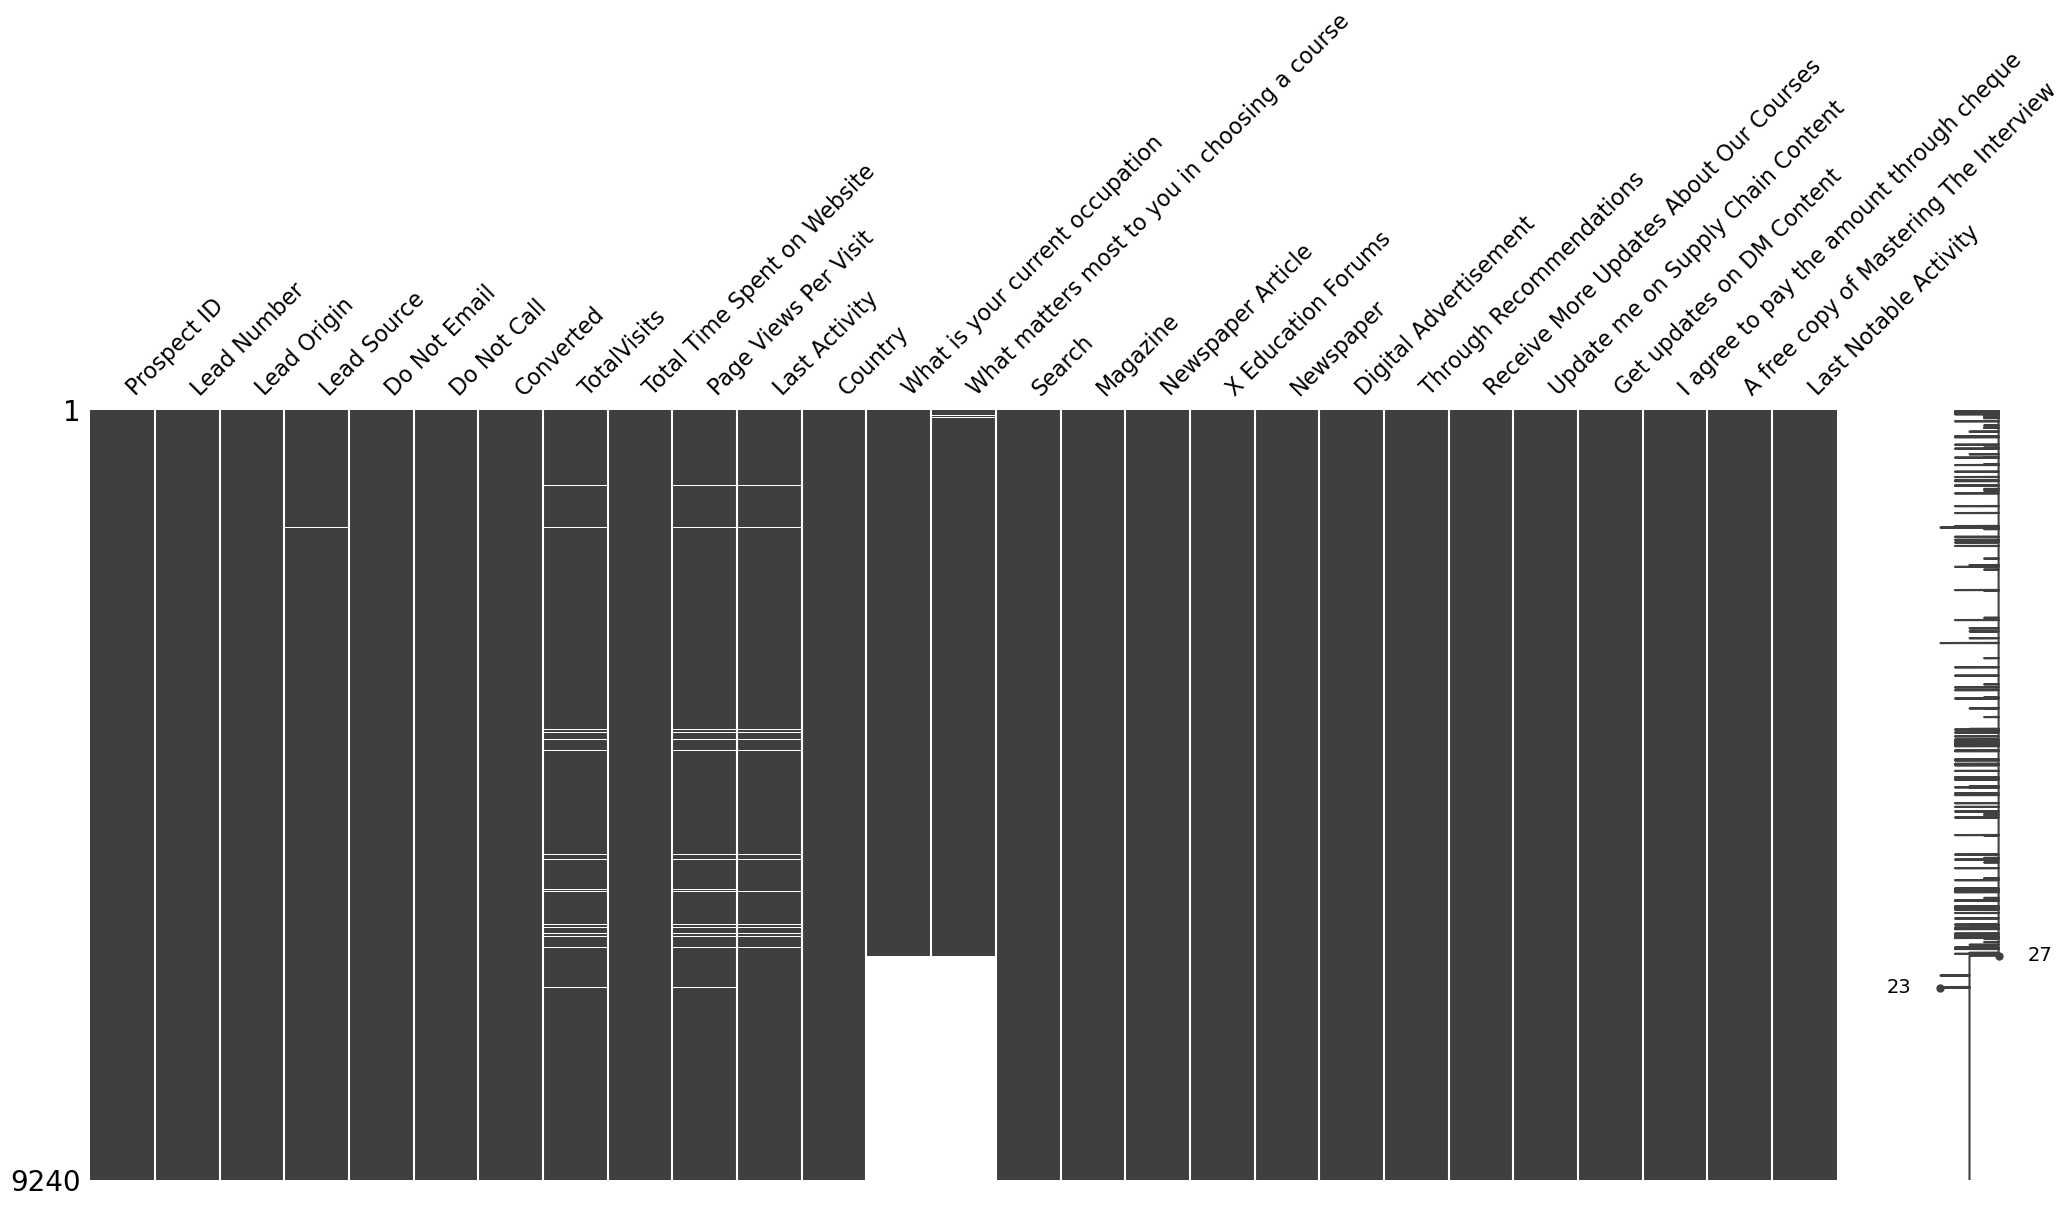

In [443]:
msno.matrix(sorted_lead)

<Axes: >

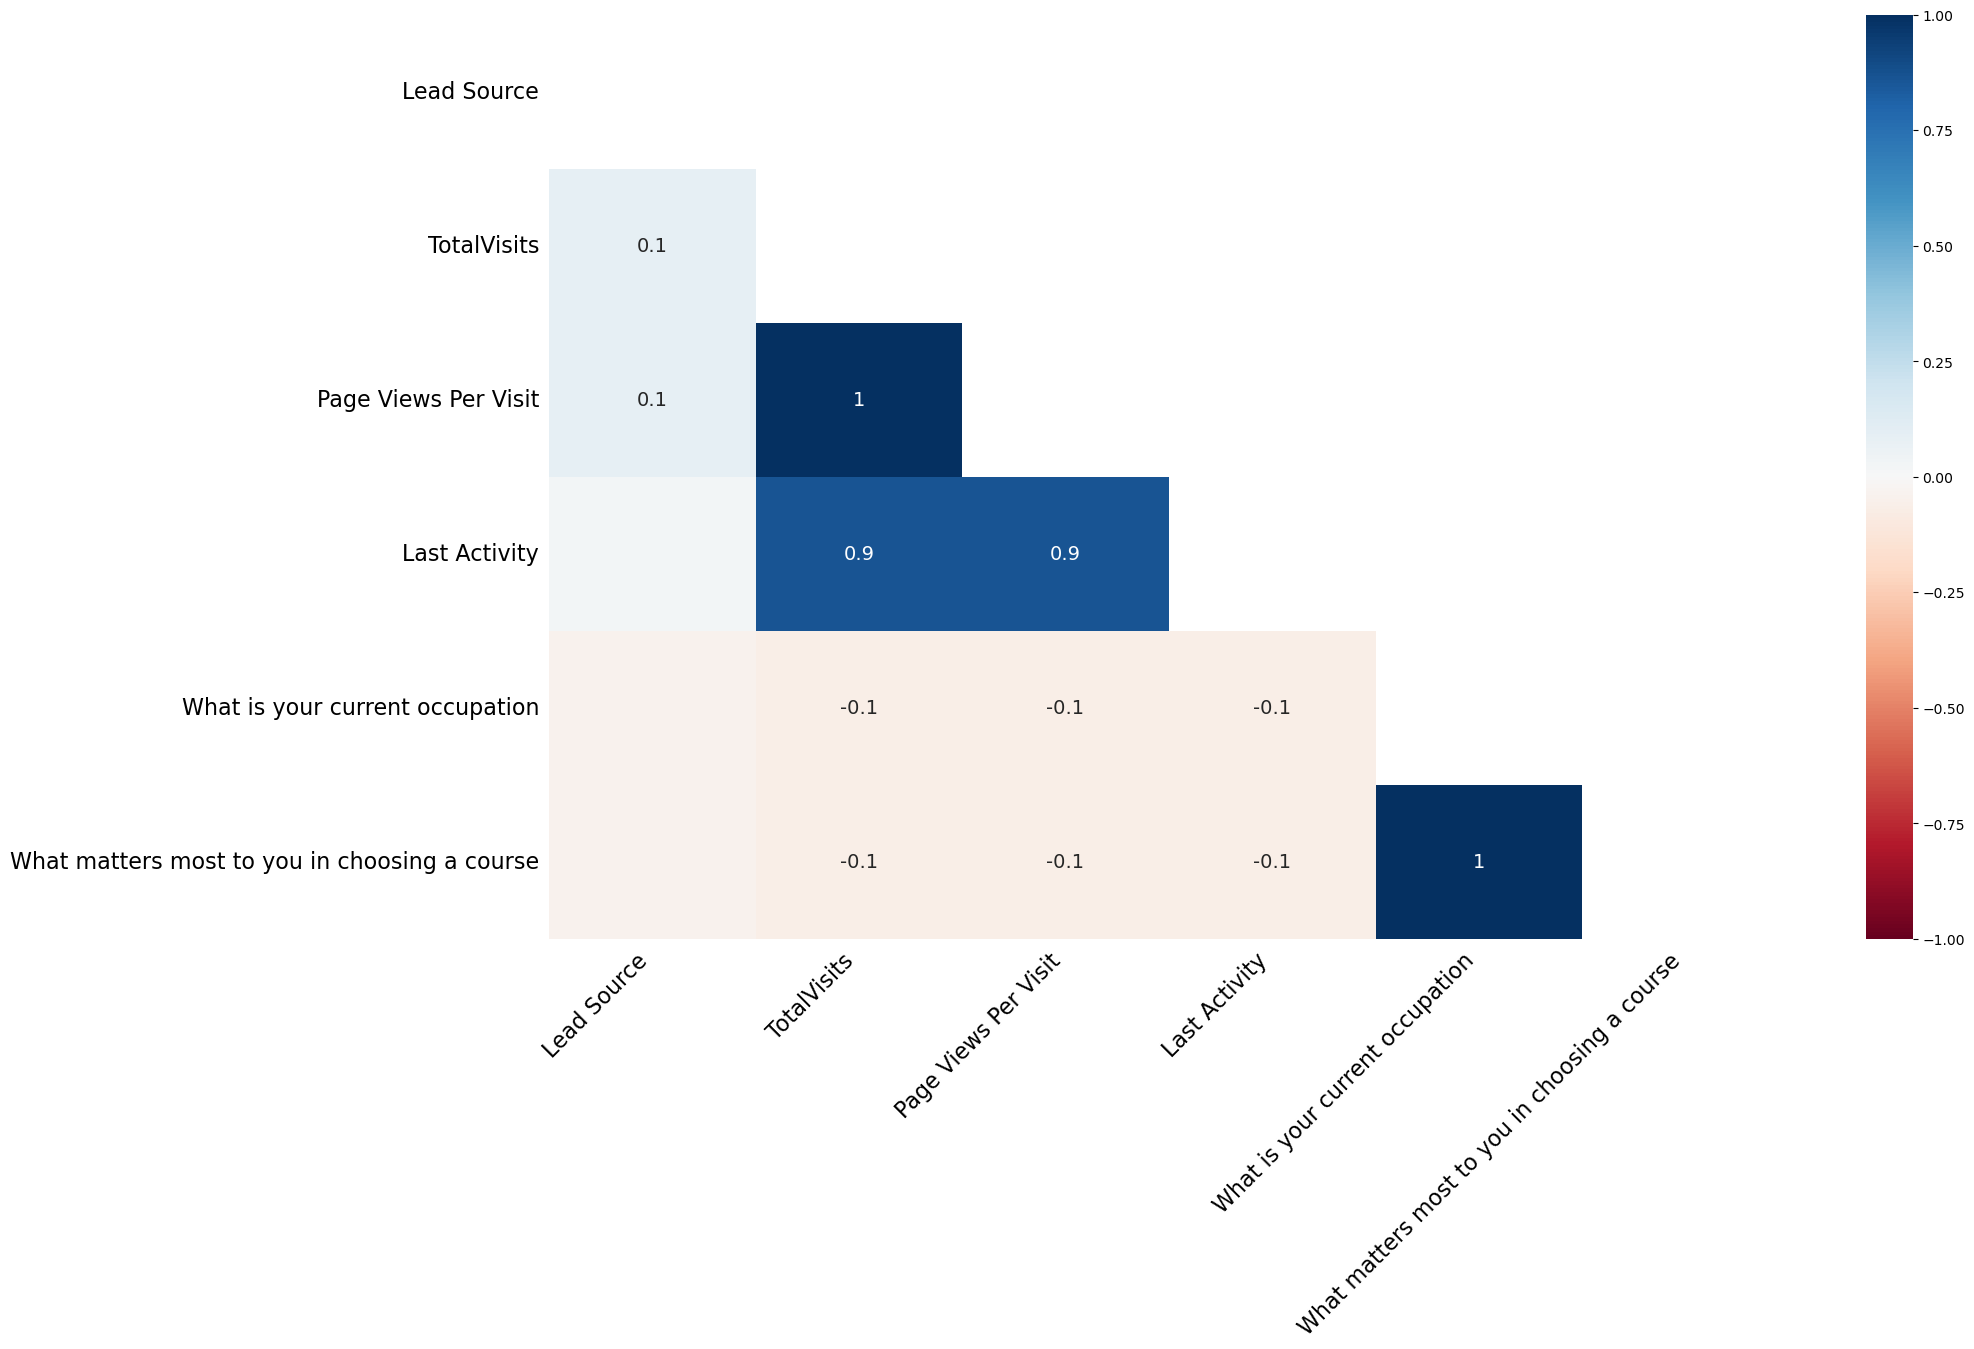

In [444]:
msno.heatmap(sorted_lead)

The missing data seems to have a pattern, meaning it's not random (MNAR). 
- We see a strong connection between missing answers for questions like 'What is your current occupation' and 'What matters most to you in choosing a course.' 

- Also, there's a similar trend between missing data in 'TotalVisits' and 'Page Views Per Visit'."

#### Filling Missing Values with "Mode" Imputation

In [445]:
lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [446]:
lead["What is your current occupation"].fillna(lead["What is your current occupation"].mode()[0],inplace=True)
lead["What matters most to you in choosing a course"].fillna(lead["What matters most to you in choosing a course"].mode()[0],inplace=True)

In [447]:
# checking null counts in terms of percentages again
round(lead.isnull().sum()/len(lead)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

#### Dropping unnecessary columns

In [448]:
lead=lead.drop(columns=["Prospect ID"])

#### Correcting Datatypes

In [449]:
# "TotalVisits"
lead["TotalVisits"]=lead["TotalVisits"].fillna(0).astype("int")

# "Page Views Per Visit"
lead["Page Views Per Visit"]=lead["Page Views Per Visit"].fillna(0).astype("int")

##### Dropping the rows of columns

In [450]:
# Dropping Rows with Null Values in Columns, as they have minimal impact on analysis.

lead=lead[~(lead["Lead Source"].isnull())]
lead=lead[~(lead["TotalVisits"].isnull())]
lead=lead[~(lead["Page Views Per Visit"].isnull())]
lead=lead[~(lead["Last Activity"].isnull())]


In [451]:
# Lets check if there any missing values left in our DataFrame

lead.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

Now that the data no longer contains any missing values, we can proceed with our analysis.

# Outlier Treatment

In [452]:
# checking descriptive statistics
lead[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].describe([0.05, 0.1, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445018,483.773921,2.293420
std,4.854963,545.519186,2.165968
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,924.000000,3.000000
80%,5.000000,1081.000000,4.000000



It’s clear that there are outliers in the data because there's a sudden jump after the 99th percentile. We need to address these outliers.

In [453]:
# using IQR

Q1 = lead["TotalVisits"].quantile(0.25)
Q3 = lead["TotalVisits"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

lead = lead[(lead["TotalVisits"] <= upper_bound) & (lead["TotalVisits"] >= lower_bound)]


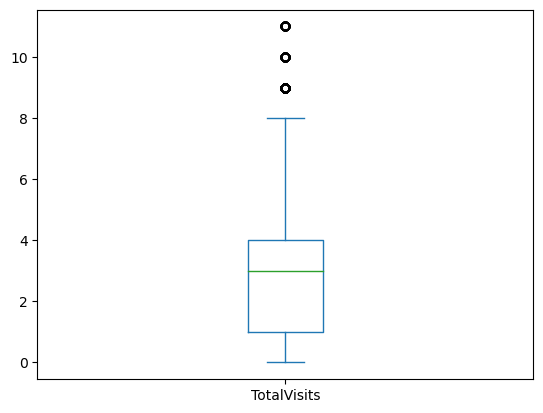

In [454]:
# visulaizing box plot for "TotalVisits" again
lead["TotalVisits"].plot.box()
plt.show()

In [455]:
# checking descriptive statistics again
lead[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].describe([0.25, 0.50, 0.75,0.90, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8836.000000,8836.000000,8836.000000
mean,2.985401,477.295948,2.213445
std,2.583109,543.959522,1.968899
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,3.000000,239.500000,2.000000
75%,4.000000,907.250000,3.000000
90%,7.000000,1370.000000,5.000000
95%,8.000000,1552.250000,6.000000
96%,9.000000,1599.000000,6.000000


<Figure size 800x600 with 0 Axes>

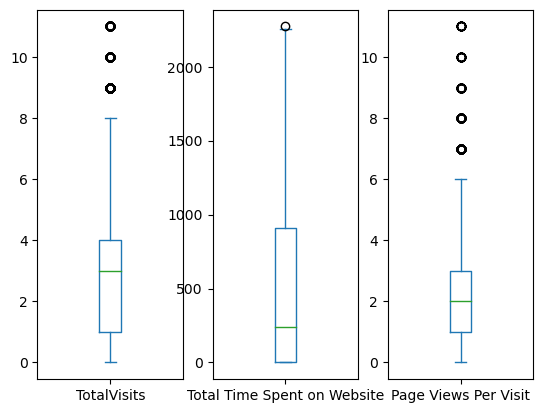

In [456]:
# checking outliers again 
plt.figure(figsize=(8,6))
lead[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].plot.box(subplots=True)
plt.show()

The outliers have been effectively addressed, and the treatment is fair enough. We can now proceed with our analysis.







# Univariate analysis

##### "Country" column

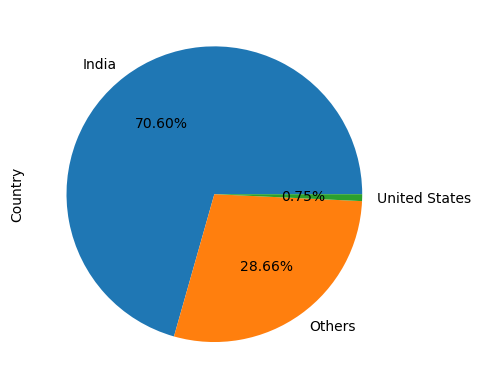

In [457]:
lead["Country"].value_counts(normalize=True).plot.pie(autopct="%.02f%%")
plt.show()

Most of our customers, about 70%, are from India, which shows that course is very popular among Indian students. About 28% of our customers come from different countries around the world. Only a very small percentage, less than 1%, are from the USA specifically.

##### "Country" column

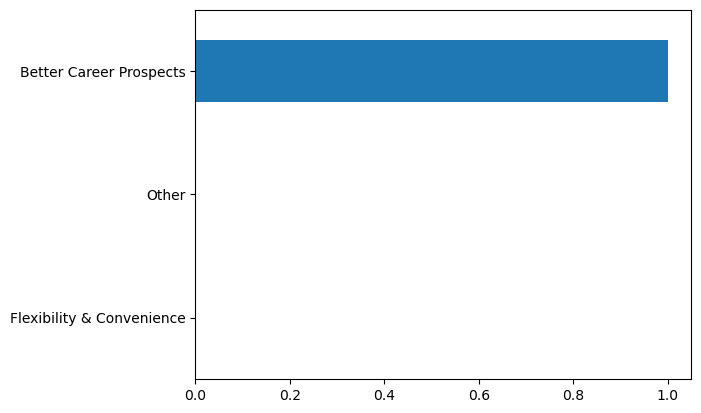

In [458]:
lead["What matters most to you in choosing a course"].value_counts(normalize=True).sort_values().plot.barh()
plt.show()

Nearly all, around 99%, of respondents prioritize "Better career prospects" as their primary motivation for selecting this course. This underscores a clear focus on advancing their professional opportunities and achieving career growth through the education offered.

##### "Page Views Per Visit"  & "Total Time Spent on Website"  & "TotalVisits" columns

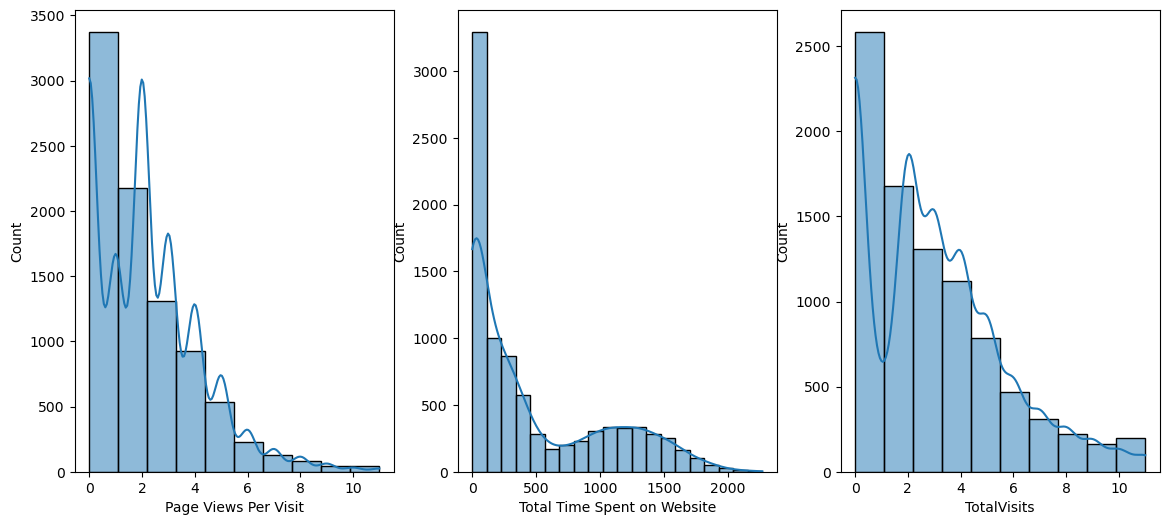

In [459]:
plt.figure(figsize=(14, 6))
plt.subplot(1,3,1)
sns.histplot(lead["Page Views Per Visit"],bins=10,kde=True)
plt.subplot(1,3,2)
sns.histplot(lead["Total Time Spent on Website"],bins=20,kde=True)
plt.subplot(1,3,3)
sns.histplot(lead["TotalVisits"],kde=True,bins=10)
plt.show()

The distribution plot reveals that visitors generally view only 2 to 3 pages per visit, indicating limited exploration of the website. This suggests opportunities to improve site navigation, make content more relevant, and enhance the user experience to encourage deeper engagement.

Additionally, it's evident that most customers spend less than 2 minutes on the website. This suggests the site might lack engagement or make it difficult for customers to find what they need quickly. This lack of engagement likely contributes to the lower average number of pages viewed per visit.
 

##### "Lead Origin" column

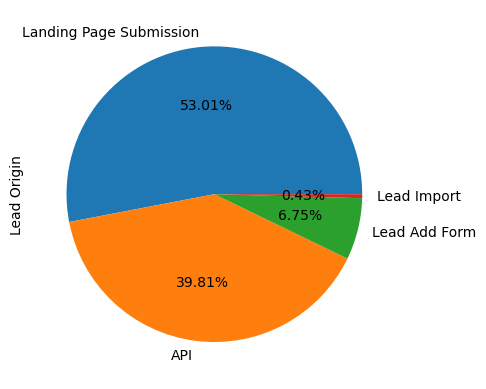

In [460]:
lead["Lead Origin"].value_counts(normalize=True).plot.pie(autopct="%0.2f%%")
plt.show()

More than half of leads (53%) come from landing page submissions, showing website forms are highly effective. APIs contribute nearly 40% of leads, highlighting automated data exchanges. Manual entries and imported leads are less common but still add to overall lead acquisition strategies.

##### "Lead Source" column

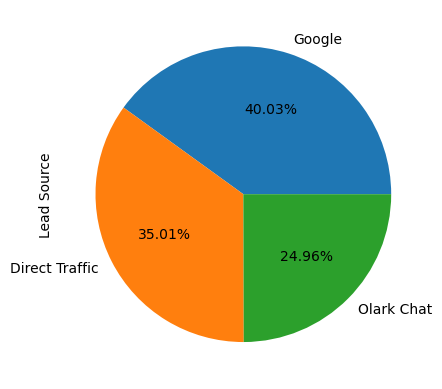

In [461]:
lead["Lead Source"].value_counts().head(3).plot.pie(autopct="%.2f%%")
plt.show()

Google, Direct Traffic, and Olark Chat are the **top three** lead sources.These sources highlight effective lead generation through search engines, direct visits, and live chat interactions. Understanding these top sources helps optimize lead acquisition strategies accordingly.

# Bivariate Analysis

In [462]:
lead.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0,0,0,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5,674,2,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


##### "Converted" Vs "What is your current occupation"

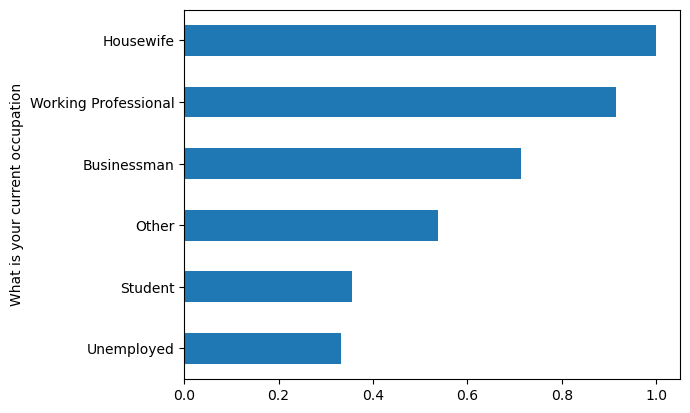

In [463]:
lead.groupby("What is your current occupation")["Converted"].mean().sort_values().plot.barh()
plt.show()

The conversion rates vary by occupation. Working Professionals have the highest rate at 91%, and Housewives have a perfect 100% conversion, though the group is small. Businessmen convert at 71%. Students and Unemployed individuals have lower rates, around 35% and 33%. Targeting Working Professionals and Businessmen could improve overall conversion rates.

##### "Converted" Vs "Lead Origin"

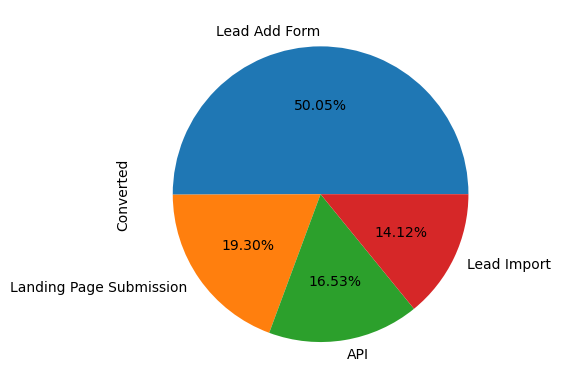

In [464]:
lead.groupby("Lead Origin")["Converted"].mean().sort_values(ascending=False).plot.pie(autopct="%.02f%%")
plt.show()

The conversion rates vary by lead origin. The Lead Add Form has the highest conversion rate at approximately 93%, indicating its effectiveness. In contrast, Landing Page Submissions, API, and Lead Imports have lower conversion rates, around 36%, 31%, and 26% respectively, suggesting these methods are less effective.

#####  "Converted" Vs "Lead Source"

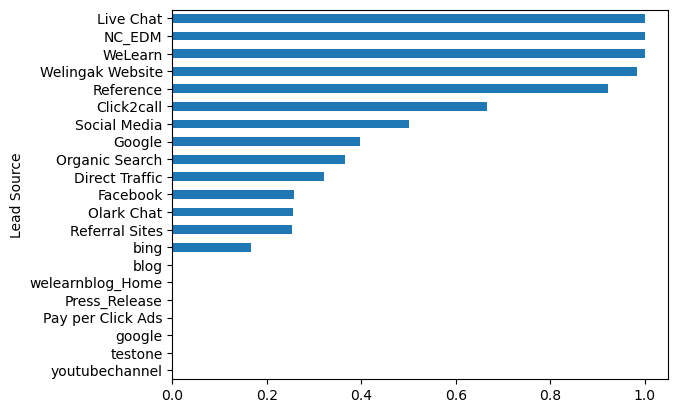

In [465]:
lead.groupby("Lead Source")["Converted"].mean().sort_values().plot.barh()
plt.show()

The data reveals how successful different lead sources are at converting leads into customers. Sources like "Live Chat," "WeLearn," and "NC_EDM" convert all leads they generate, showing they are highly effective. On the other hand, "Google" and "Organic Search" also perform well with about 40% conversion rates. However, sources like "youtubechannel," "testone," and "google" have not converted any leads in the dataset, suggesting they may need improvement or might not be effective for this business. This information helps in focusing on the most effective lead sources to increase customer conversions.

##### "Converted" Vs "Last Activity"

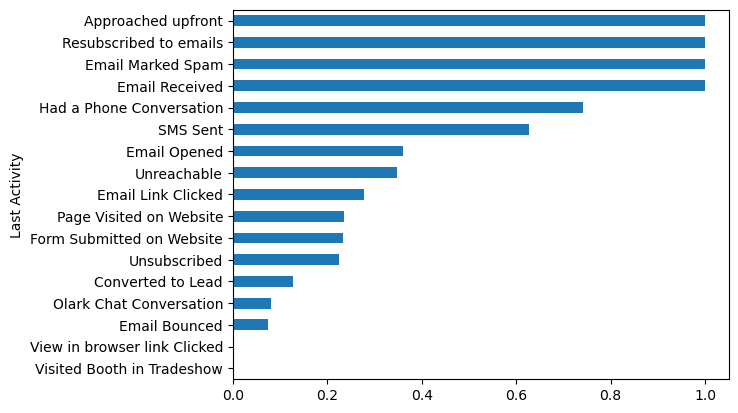

In [466]:
lead.groupby("Last Activity")["Converted"].mean().sort_values().plot.barh()
plt.show()

The data reveals that how activities impact lead conversion varies greatly. Some actions like "Visited Booth in Tradeshow" and "View in browser link Clicked" don't lead to any conversions, showing they might not engage leads effectively. On the contrary, direct interactions like "Had a Phone Conversation" and "Approached upfront" always result in conversion, highlighting their effectiveness. "SMS Sent" also performs well, indicating timely messages can convert leads effectively. This shows the need to adjust engagement strategies based on how each interaction influences conversion rates.

# Preparing the Data for Modelling

In [467]:
lead.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0,0,0,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5,674,2,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


### Encoding

##### Binary encoding

In [468]:
varlist=['Do Not Email',"Do Not Call",'Search','Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

lead[varlist]=lead[varlist].apply(lambda x:x.map({"Yes":1,"No":0}))

##### One Hot Encoding (OHE)

In [469]:
# Creating dummy variables for variable "Lead Origin" 
df=pd.get_dummies(lead["Lead Origin"],prefix="Origin",drop_first=True)
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["Lead Origin"],inplace=True)

# Creating dummy variables for variable "Lead Source" 
df=pd.get_dummies(lead["Lead Source"],prefix="Source",drop_first=True)   
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["Lead Source"],inplace=True)

# Creating dummy variables for variable "Last Activity" 
df=pd.get_dummies(lead["Last Activity"],prefix="Activity",drop_first=True)          
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["Last Activity"],inplace=True)

#  Creating dummy variables for variable "Country" 
df=pd.get_dummies(lead["Country"],prefix="Country",drop_first=True)
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["Country"],inplace=True)

# Creating dummy variables for variable "What is your current occupation" 
df=pd.get_dummies(lead["What is your current occupation"],prefix="Occupation",drop_first=True)
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["What is your current occupation"],inplace=True)       

# Creating dummy variables for variable "What matters most to you in choosing a course" 
df=pd.get_dummies(lead["What matters most to you in choosing a course"],prefix="Choosing",drop_first=True)   
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["What matters most to you in choosing a course"],inplace=True)

# Creating dummy variables for variable "Last Notable Activity" 
df=pd.get_dummies(lead["Last Notable Activity"],prefix="LNA",drop_first=True)           
lead=pd.concat([lead,df],axis=1)
lead.drop(columns=["Last Notable Activity"],inplace=True)

### train-test split

In [470]:
df_train,df_test=train_test_split(lead,train_size=0.7,stratify=lead['Converted'],random_state=100)

In [471]:
df_train["Converted"].value_counts(normalize=True)

0    0.622635
1    0.377365
Name: Converted, dtype: float64

In [472]:
lead["Converted"].value_counts(normalize=True)

0    0.622567
1    0.377433
Name: Converted, dtype: float64

In [473]:
df_test["Converted"].value_counts(normalize=True)

0    0.622407
1    0.377593
Name: Converted, dtype: float64

### Rescaling

In [474]:
scaler=MinMaxScaler()

num_list=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

df_train[num_list]=scaler.fit_transform(df_train[num_list])
df_test[num_list]=scaler.transform(df_test[num_list])

### Dividing into X_train,y_train,X_test,y_test

In [475]:
X_train=df_train.drop(columns=["Lead Number","Converted"],axis=1)
y_train=df_train["Converted"]
X_test=df_test.drop(columns=["Lead Number","Converted"],axis=1)
y_test=df_test["Converted"]

In [476]:
lead["Converted"].value_counts(normalize=True)

0    0.622567
1    0.377433
Name: Converted, dtype: float64

# Lookings at Correlations

Let's examine the correlations between the features to understand how the different independent variables relate to each other.

In [477]:
lead.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,Source_NC_EDM,Source_Olark Chat,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_blog,Source_google,Source_testone,Source_welearnblog_Home,Source_youtubechannel,Activity_Converted to Lead,Activity_Email Bounced,Activity_Email Link Clicked,Activity_Email Marked Spam,Activity_Email Opened,Activity_Email Received,Activity_Form Submitted on Website,Activity_Had a Phone Conversation,Activity_Olark Chat Conversation,Activity_Page Visited on Website,Activity_Resubscribed to emails,Activity_SMS Sent,Activity_Unreachable,Activity_Unsubscribed,Activity_View in browser link Clicked,Activity_Visited Booth in Tradeshow,Country_Others,Country_United States,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Choosing_Flexibility & Convenience,Choosing_Other,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Marked Spam,LNA_Email Opened,LNA_Email Received,LNA_Form Submitted on Website,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_Resubscribed to emails,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed,LNA_View in browser link Clicked
Lead Number,1.000000,-0.096480,0.012284,0.026073,0.053119,0.021651,0.061016,-0.021610,NaN,-0.014522,NaN,0.004766,-0.018988,-0.004933,NaN,NaN,NaN,NaN,-0.107696,-0.067376,0.022488,0.086358,-0.144125,0.083794,0.138511,0.012512,-0.015532,-0.069130,-0.011420,0.014969,-0.011186,0.021111,0.169150,-0.000532,0.011923,0.002808,0.013507,0.015220,0.032729,-0.003411,0.006849,0.003939,0.013974,-0.051103,0.029105,-0.021465,0.104686,-0.017957,0.011816,0.001292,0.002039,0.014735,0.006142,-0.135661,0.072043,0.002282,0.023860,0.015189,-0.042755,-0.031398,-0.014094,-0.009066,-0.033672,0.034761,-0.017582,-0.000458,-0.013757,-0.001107,0.018013,-0.021465,0.083125,-0.012868,0.000691,0.001239,0.072456,-0.033951,0.005678,0.006142,-0.169712,0.008146,0.002119,0.001593
Do Not Email,-0.096480,1.000000,-0.004379,-0.136115,-0.010929,-0.043524,0.023293,-0.009796,NaN,-0.003096,NaN,-0.003096,-0.005364,-0.007587,NaN,NaN,NaN,NaN,0.053383,0.096537,-0.026137,-0.012681,0.106940,-0.013015,-0.069747,-0.004379,-0.003096,-0.051354,0.040064,-0.003096,0.036555,-0.030230,-0.011091,-0.004379,-0.003096,0.003546,-0.007587,-0.003096,0.010811,-0.003096,-0.003096,0.036555,-0.063617,0.632181,-0.043188,0.051699,-0.219330,-0.004379,-0.021465,-0.008471,-0.054170,0.061381,-0.003096,-0.017911,0.008660,0.263625,-0.006925,-0.003096,-0.043586,0.072728,-0.009293,-0.000167,0.008862,0.039081,-0.047761,-0.003096,-0.003096,0.281709,-0.037165,0.051699,-0.188088,-0.003096,-0.003096,-0.010733,0.124323,-0.011506,0.035493,-0.003096,-0.027545,-0.010525,0.243069,-0.003096
Do Not Call,0.012284,-0.004379,1.000000,0.019325,0.008823,0.007295,-0.005453,-0.000506,NaN,-0.000160,NaN,-0.000160,-0.000277,-0.000392,NaN,NaN,NaN,NaN,-0.010072,-0.015981,0.025950,-0.000989,-0.009325,-0.001002,0.005905,-0.000226,-0.000160,-0.007472,-0.005567,-0.000160,-0.000160,0.030340,-0.001728,-0.000226,-0.000160,-0.001824,-0.000392,-0.000160,-0.000358,-0.000160,-0.000160,-0.000160,-0.003391,-0.002917,-0.002620,-0.000226,0.003767,-0.000226,-0.001697,-0.000833,0.018922,-0.003873,-0.000160,-0.009901,-0.001518,-0.001223,-0.000358,-0.000160,0.007103,-0.001305,-0.000480,-0.000578,-0.002307,0.005055,-0.004289,-0.000160,-0.000160,-0.001234,-0.002082,-0.

In [478]:
# Dropping Highly Correlated Variables

unwanted_columns=["Page Views Per Visit","Source_Facebook","Source_Reference","Country_Others",
                  "Occupation_Working Professional","LNA_Email Link Clicked",
                  "LNA_Email Marked Spam","LNA_Email Opened","LNA_Email Received","LNA_Resubscribed to emails",
                  "LNA_SMS Sent","LNA_Unsubscribed"]

X_train=X_train.drop(columns=unwanted_columns,axis=1)

X_test=X_test.drop(columns=unwanted_columns,axis=1)


# Model Building

Running our First Training model

<span style="color:green; font-weight:bold; background-color:yellow; font-size:18px;">Model 1</span>



In [479]:
# adding a constant
X_train_sm=sm.add_constant(X_train)

# create a model and fit
logr_1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()

#params
logr_1.params

#summary
logr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6128
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Jun 2024   Deviance:                   1.5529e+05
Time:                        13:05:02   Pearson chi2:                 7.59e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     2.018e+15   7.28e+07   2.77e+07      0.000    2.02e+15    2.02e+15
Do Not Email                             -6.489e+14   4.46e+06  -1.46e+08      0.000   -6.49e+14   -6.49e+14
Do Not Call                               1.794e+15   4.76e+07   3.77e+07      0.000    1.79e+15    1.79e+15
TotalVisits                               1.815e+14   5.35e+06   3.39e+07      0.000    1.81e+14    1.81e+14
Total Time Spent on Website              -3.848e+14   4.14e+06  -9.29e+07      0.000   -3.85e+14   -3.85e+14
Search                                   -6.126e+14   2.55e+07   -2.4e+07      0.000   -6.13e+14   -6.13e+14
Magazine                                   -49.1108   5.66e-07  -8.67e+07      0.000     -49.111     -49.111
Newspaper Article                          -40.0274   2.86e-07   -1.4e+08      0.000     -40.027     -40.027
X Education Forums                         -49.4323   3.75e-07  -1.32e+08      0.000     -49.432     -49.432
Newspaper                                -1.329e+16   6.73e+07  -1.98e+08      0.000   -1.33e+16   -1.33e+16
Digital Advertisement                    -3.662e+14   4.76e+07   -7.7e+06      0.000   -3.66e+14   -3.66e+14
Through Recommendations                   1.055e+16   3.39e+07   3.11e+08      0.000    1.05e+16    1.05e+16
Receive More Updates About Our Courses      33.0203    3.9e-07   8.47e+07      0.000      33.020      33.020
Update me on Supply Chain Content           25.6834   5.07e-07   5.07e+07      0.000      25.683      25.683
Get updates on DM Content                   63.2734   3.15e-07   2.01e+08      0.000      63.273      63.273
I agree to pay the amount through cheque   -65.5226   2.26e-07   -2.9e+08      0.000     -65.523     -65.523
A free copy of Mastering The Interview   -9.442e+12   2.71e+06  -3.48e+06      0.000   -9.44e+12   -9.44e+12
Origin_Landing Page Submission           -1.168e+14    2.7e+06  -4.32e+07      0.000   -1.17e+14   -1.17e+14
Origin_Lead Add Form                      5.414e+15   6.74e+07   8.04e+07      0.000    5.41e+15    5.41e+15
Origin_Lead Import                        4.949e+15   6.87e+07    7.2e+07      0.000    4.95e+15    4.95e+15
Source_Direct Traffic                     4.944e+15   6.76e+07   7.31e+07      0.000    4.94e+15    4.94e+15
Source_Google                             5.032e+15   6.76e+07   7.44e+07      0.000    5.03e+15    5.03e+15
Source_Live Chat                          3.917e+14   4.76e+07   8.22e+06      0.000    3.92e+14    3.92e+14
Source_NC_EDM                               12.9877    1.1e-07   1.18e+08      0.000      12.988      12.988
Source_Olark Chat                         5.713e+15   6.75e+07   8.47e+07      0.000    5.71e+15    5.71e+15
Source_Organic Search          

<span style="color:green; font-weight:bold; background-color:yellow; font-size:18px;">Model 2</span>

**Feature selection using RFE**

In [480]:
# Running RFE with the no. of variables equal to 15

In [481]:
# creating a logistic regression object and then fit

lm=LogisticRegression()
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [482]:
list(zip(X_train.columns,rfe.ranking_,rfe.support_))

[('Do Not Email', 1, True),
 ('Do Not Call', 2, False),
 ('TotalVisits', 5, False),
 ('Total Time Spent on Website', 1, True),
 ('Search', 41, False),
 ('Magazine', 47, False),
 ('Newspaper Article', 46, False),
 ('X Education Forums', 44, False),
 ('Newspaper', 3, False),
 ('Digital Advertisement', 39, False),
 ('Through Recommendations', 8, False),
 ('Receive More Updates About Our Courses', 43, False),
 ('Update me on Supply Chain Content', 50, False),
 ('Get updates on DM Content', 53, False),
 ('I agree to pay the amount through cheque', 51, False),
 ('A free copy of Mastering The Interview', 42, False),
 ('Origin_Landing Page Submission', 22, False),
 ('Origin_Lead Add Form', 1, True),
 ('Origin_Lead Import', 21, False),
 ('Source_Direct Traffic', 16, False),
 ('Source_Google', 18, False),
 ('Source_Live Chat', 33, False),
 ('Source_NC_EDM', 49, False),
 ('Source_Olark Chat', 1, True),
 ('Source_Organic Search', 17, False),
 ('Source_Pay per Click Ads', 30, False),
 ('Source_Pres

In [483]:
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'Activity_Olark Chat Conversation', 'Activity_SMS Sent',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Choosing_Flexibility & Convenience', 'LNA_Had a Phone Conversation',
       'LNA_Modified', 'LNA_Olark Chat Conversation', 'LNA_Unreachable'],
      dtype='object')

In [484]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Origin_Landing Page Submission', 'Origin_Lead Import',
       'Source_Direct Traffic', 'Source_Google', 'Source_Live Chat',
       'Source_NC_EDM', 'Source_Organic Search', 'Source_Pay per Click Ads',
       'Source_Press_Release', 'Source_Referral Sites', 'Source_Social Media',
       'Source_WeLearn', 'Source_bing', 'Source_blog', 'Source_google',
       'Source_testone', 'Source_welearnblog_Home', 'Source_youtubechannel',
       'Activity_Converted to Lead', 'Activity_Email Bounced',
       'Activity_Email Link Clicked', 'Activity_Email Marked Spam',
       'Activity_Email Opened', 'Act

**Assessing the model with detail statsmodels for detail statsistics**

In [485]:
X_train_rfe=X_train[col]

In [486]:
# adding a constant
X_train_rfe_sm=sm.add_constant(X_train_rfe)

# create a model and fit
logr_2=sm.GLM(y_train,X_train_rfe_sm,family=sm.families.Binomial()).fit()

#params
logr_2.params

#summary
logr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.2
Date:                Tue, 18 Jun 2024   Deviance:                       5150.3
Time:                        13:05:09   Pearson chi2:                 6.58e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.6087      0.193      3.152      0.002       0.230       0.987
Do Not Email                          -1.3832      0.170     -8.120      0.000      -1.717      -1.049
Total Time Spent on Website            4.6668      0.170     27.487      0.000       4.334       5.000
Origin_Lead Add Form                   3.8085      0.212     17.935      0.000       3.392       4.225
Source_Olark Chat                      1.1896      0.104     11.481      0.000       0.987       1.393
Source_Welingak Website                1.9702      0.754      2.612      0.009       0.492       3.449
Activity_Olark Chat Conversation      -0.8491      0.199     -4.257      0.000      -1.240      -0.458
Activity_SMS Sent                      1.2408      0.075     16.443      0.000       1.093       1.389
Occupation_Other                      -2.0648      0.719     -2.871      0.004      -3.474      -0.655
Occupation_Student                    -2.3110      0.284     -8.128      0.000      -2.868      -1.754
Occupation_Unemployed                 -2.8062      0.189    -14.845      0.000      -3.177      -2.436
Choosing_Flexibility & Convenience    22.5083   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LNA_Had a Phone Conversation           3.0921      1.116      2.771      0.006       0.905       5.279
LNA_Modified                          -0.9344      0.084    -11.137      0.000      -1.099      -0.770
LNA_Olark Chat Conversation           -1.2994      0.459     -2.832      0.005      -2.199      -0.400
LNA_Unreachable                        1.4581      0.488      2.986      0.003       0.501       2.415
======================================================================================================
"""

In [487]:
# getting the predicted values on the train set

y_train_pred=logr_2.predict(X_train_rfe_sm)

In [488]:
y_train_pred_final=pd.DataFrame({
                              "CustID": y_train.index,
                             "Converted": y_train.values,
                            "Converted_Prob": y_train_pred.values
                              })

y_train_pred_final.head()

,CustID,Converted,Converted_Prob
0,2000,0,0.083861
1,5722,0,0.097076
2,4811,0,0.339592
3,1931,1,0.331491
4,7006,0,0.370699


**Let's set an arbitrary threshold probability of 0.5 to classify customers as "Converted" or "Not Converted".**

In [489]:
y_train_pred_final["predicted"]=y_train_pred_final["Converted_Prob"].apply(lambda x:1 if x>0.5 else 0 )


# lets see the head
y_train_pred_final.head()


,CustID,Converted,Converted_Prob,predicted
0,2000,0,0.083861,0
1,5722,0,0.097076,0
2,4811,0,0.339592,0
3,1931,1,0.331491,0
4,7006,0,0.370699,0


In [490]:
# confusion matrix

confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["predicted"])

array([[3432,  419],
       [ 712, 1622]], dtype=int64)

In [491]:
# accuracy score

accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["predicted"])

0.8171382376717866

**Checking VIFs**

In [492]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,Occupation_Unemployed,3.35
12,LNA_Modified,1.98
1,Total Time Spent on Website,1.97
5,Activity_Olark Chat Conversation,1.92
3,Source_Olark Chat,1.73
6,Activity_SMS Sent,1.52
2,Origin_Lead Add Form,1.38
13,LNA_Olark Chat Conversation,1.32
4,Source_Welingak Website,1.28
0,Do Not Email,1.13


The VIFs for all variables are fine, showing no problems with how they relate to each other. However, the high p-value for 'Choosing_Flexibility & Convenience' suggests it doesn't significantly affect predictions. Removing it would simplify the model without losing accuracy.

<span style="color:green; font-weight:bold; background-color:yellow; font-size:18px;">Model 3</span>

**Dropping the variable "Choosing_Flexibility & Convenience" and updating the model**

In [493]:
X_train_new=X_train_rfe.drop(columns=["Choosing_Flexibility & Convenience"],axis=1)

In [494]:
# adding a constant
X_train_sm=sm.add_constant(X_train_new)

# create a model and fit
logr_3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()

#params
logr_3.params

#summary
logr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6170
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.2
Date:                Tue, 18 Jun 2024   Deviance:                       5154.5
Time:                        13:05:10   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.6074      0.193      3.146      0.002       0.229       0.986
Do Not Email                        -1.3843      0.170     -8.129      0.000      -1.718      -1.051
Total Time Spent on Website          4.6651      0.170     27.485      0.000       4.332       4.998
Origin_Lead Add Form                 3.8072      0.212     17.933      0.000       3.391       4.223
Source_Olark Chat                    1.1953      0.104     11.544      0.000       0.992       1.398
Source_Welingak Website              1.9714      0.754      2.614      0.009       0.493       3.450
Activity_Olark Chat Conversation    -0.8576      0.199     -4.301      0.000      -1.248      -0.467
Activity_SMS Sent                    1.2393      0.075     16.429      0.000       1.091       1.387
Occupation_Other                    -2.0648      0.719     -2.871      0.004      -3.474      -0.655
Occupation_Student                  -2.3114      0.284     -8.132      0.000      -2.869      -1.754
Occupation_Unemployed               -2.8048      0.189    -14.842      0.000      -3.175      -2.434
LNA_Had a Phone Conversation         3.0923      1.116      2.772      0.006       0.906       5.279
LNA_Modified                        -0.9294      0.084    -11.090      0.000      -1.094      -0.765
LNA_Olark Chat Conversation         -1.2941      0.459     -2.821      0.005      -2.193      -0.395
LNA_Unreachable                      1.4574      0.488      2.984      0.003       0.500       2.415
====================================================================================================
"""

**Lets Check  VIFs again**

In [495]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Occupation_Unemployed,3.35
1,Total Time Spent on Website,1.97
11,LNA_Modified,1.97
5,Activity_Olark Chat Conversation,1.92
3,Source_Olark Chat,1.72
6,Activity_SMS Sent,1.52
2,Origin_Lead Add Form,1.38
12,LNA_Olark Chat Conversation,1.32
4,Source_Welingak Website,1.28
0,Do Not Email,1.13


All variables have a good value of VIF and p-value is within range.So we need not drop any more variables and we can proceed with making predictions using this model only

In [496]:
# getting the predicted values on the train set
y_train_pred=logr_3.predict(X_train_sm)

In [497]:
y_train_pred_final["Converted_Prob"]=y_train_pred.values

In [498]:
y_train_pred_final["predicted"]=y_train_pred_final["Converted_Prob"].apply(lambda x:1 if x>0.5 else 0 )
y_train_pred_final["Lead Score"] = y_train_pred_final["Converted_Prob"].apply(lambda x: round(x*100))

# lets see the head
y_train_pred_final.head()

,CustID,Converted,Converted_Prob,predicted,Lead Score
0,2000,0,0.084215,0,8
1,5722,0,0.097489,0,10
2,4811,0,0.339473,0,34
3,1931,1,0.333534,0,33
4,7006,0,0.371406,0,37


In [499]:
# confusion matrix

confusion=confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["predicted"])
confusion

array([[3432,  419],
       [ 713, 1621]], dtype=int64)

In [500]:
# accuracy score

accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["predicted"])

0.8169765561843169


After removing the variable "Choosing_Flexibility & Convenience" ,we observed that the accuracy of our model remains largely **unchanged**. This allows us to proceed confidently with this simplified model logr_3.

# Finding the Optimal Cut-off Point

### Sensitivity-Specificity trade-off

In [501]:
confusion

# [ TN   FP ]
# [ FN    TP]

array([[3432,  419],
       [ 713, 1621]], dtype=int64)

In [502]:
TN=confusion[0,0]     #true negative
TP=confusion[1,1]     #true posituve
FN=confusion[1,0]     #false negative
FP=confusion[0,1]     #false positive

In [503]:
# Lets see the sensitivity of logistic regression model
sensitivity= TP/(TP+FN)
sensitivity

0.694515852613539

In [504]:
# Lets see the sensitivity of logistic regression model
specificity= TN/(TN+FP)
specificity

0.8911970916645027

In [505]:
# Some other metrics

# True Positive Rate (Sensitivity)
true_positive_rate=TP/(TP+FN)
print(f"true_positive_rate : {true_positive_rate}")

# False Positive Rate (1-Specificity)
false_positive_rate=FP/(TN+FP)
print(f"false_positive_rate : {false_positive_rate}")

# Postive Predictive Value
postive_predictive_value=TP/(TP+FP)
print(f"postive_predictive_value : {postive_predictive_value}")

# Negative Predictive Value
negative_predictive_value=TN/(TN+FN)
print(f"negative_predictive_value : {negative_predictive_value}")

true_positive_rate : 0.694515852613539
false_positive_rate : 0.10880290833549727
postive_predictive_value : 0.7946078431372549
negative_predictive_value : 0.8279855247285887


#### Plotting the ROC Curve

In [506]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [507]:
fpr, tpr, thresholds =roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], 
                                                                                           drop_intermediate = False )

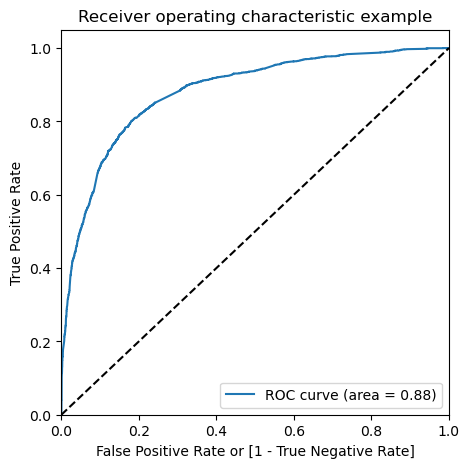

In [508]:
# calling the function

draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

In [509]:
numbers=[x/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final["Converted_Prob"].apply(lambda x:1 if x>i else 0)

y_train_pred_final.head()

,CustID,Converted,Converted_Prob,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2000,0,0.084215,0,8,1,0,0,0,0,0,0,0,0,0
1,5722,0,0.097489,0,10,1,0,0,0,0,0,0,0,0,0
2,4811,0,0.339473,0,34,1,1,1,1,0,0,0,0,0,0
3,1931,1,0.333534,0,33,1,1,1,1,0,0,0,0,0,0
4,7006,0,0.371406,0,37,1,1,1,1,0,0,0,0,0,0


In [510]:
# Now let's calculate accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TN=confusion[0,0]     #true negative
# TP=confusion[1,1]     #true posituve
# FN=confusion[1,0]     #false negative
# FP=confusion[0,1]     #false positive

num=[x/10 for x in range(10)]
for i in num:
    cm= confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i,accuracy,sensi,speci]
    
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377365,1.000000,0.000000
0.1,0.1,0.590784,0.970009,0.360945
0.2,0.2,0.740825,0.909597,0.638535
0.3,0.3,0.798707,0.834190,0.777201
0.4,0.4,0.816815,0.764781,0.848351
0.5,0.5,0.816977,0.694516,0.891197
0.6,0.6,0.798222,0.590403,0.924176
0.7,0.7,0.781407,0.500000,0.951961
0.8,0.8,0.760873,0.411740,0.972475
0.9,0.9,0.712369,0.256641,0.988574


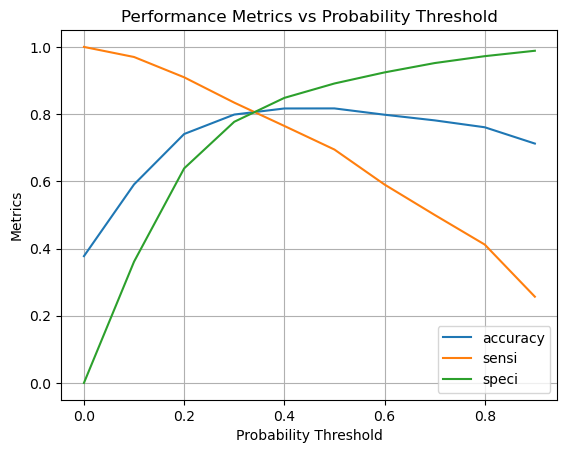

In [511]:
# Let's plot accuracy,sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(True)
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Performance Metrics vs Probability Threshold')
plt.show()

#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

In [512]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].apply( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()


,CustID,Converted,Converted_Prob,predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,2000,0,0.084215,0,8,1,0,0,0,0,0,0,0,0,0,0
1,5722,0,0.097489,0,10,1,0,0,0,0,0,0,0,0,0,0
2,4811,0,0.339473,0,34,1,1,1,1,0,0,0,0,0,0,1
3,1931,1,0.333534,0,33,1,1,1,1,0,0,0,0,0,0,1
4,7006,0,0.371406,0,37,1,1,1,1,0,0,0,0,0,0,1


In [513]:
# Let's check the overall accuracy now
accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.8037186742118028

In [514]:
confusion = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"] )
confusion

array([[3049,  802],
       [ 412, 1922]], dtype=int64)

In [515]:
TN=confusion[0,0]     #true negative
TP=confusion[1,1]     #true posituve
FN=confusion[1,0]     #false negative
FP=confusion[0,1]     #false positive

In [516]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8234790059982862

In [517]:
# Let us calculate specificity
TN /(TN+FP)

0.7917424045702415

In [518]:
# Some other metrics

# True Positive Rate (Sensitivity)
true_positive_rate=TP/(TP+FN)
print(f"true_positive_rate : {true_positive_rate}")

# False Positive Rate (1-Specificity)
false_positive_rate=FP/(TN+FP)
print(f"false_positive_rate : {false_positive_rate}")

# Postive Predictive Value
postive_predictive_value=TP/(TP+FP)
print(f"postive_predictive_value : {postive_predictive_value}")

# Negative Predictive Value
negative_predictive_value=TN/(TN+FN)
print(f"negative_predictive_value : {negative_predictive_value}")

true_positive_rate : 0.8234790059982862
false_positive_rate : 0.2082575954297585
postive_predictive_value : 0.7055800293685757
negative_predictive_value : 0.8809592603293845


### Precision-Recall trade-off

In [519]:
#Looking at the confusion matrix again that we have

confusion

# [ TN   FP ]
# [ FN    TP]

array([[3049,  802],
       [ 412, 1922]], dtype=int64)

In [520]:
# Precision(Positve Predictive Value)

precision_score(y_train_pred_final["Converted"],y_train_pred_final["predicted"])

0.7946078431372549

In [521]:
#Recall(Sensitivity)

recall_score(y_train_pred_final["Converted"],y_train_pred_final["predicted"])

0.694515852613539

In [522]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

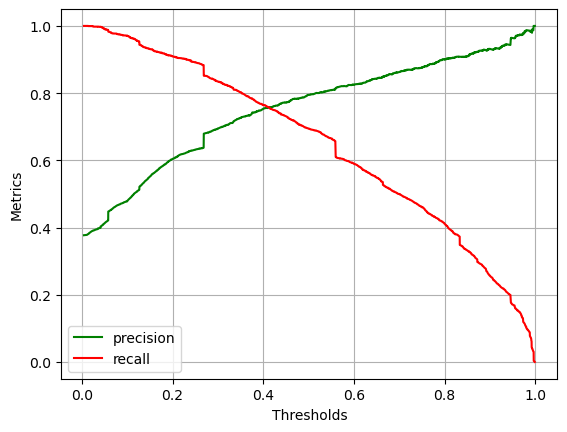

In [523]:
plt.plot(thresholds, p[:-1], "g-",label="precision")
plt.plot(thresholds, r[:-1], "r-",label="recall")
plt.xlabel("Thresholds")
plt.ylabel("Metrics")
plt.grid(True)
plt.legend()
plt.show()



# Making predictions on the test set

we have to choose one threshold that we determined during the training phase. Now, you can choose either the sensitivity-specificity view (where the cut-off came to be 0.32) or the precision-recall view (where the cut-off came to be 0.41) when making predictions

we will go forward with the precision-recall  view of things and make predictions based on the 0.41 cut-off 

In [524]:
# creating a X_tet_new DataFrame be selecting the variables that were part of final model
X_test_new = X_test[X_train_new.columns]

In [525]:
# add a constant to test DataFrame
X_test_sm=sm.add_constant(X_test_new)

In [526]:
# making prediction on the test set using our final model
y_test_pred = logr_3.predict(X_test_sm)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [527]:
y_test_pred_final=pd.DataFrame({
                              "CustID": y_test.index,
                             "Converted": y_test.values,
                            "Converted_Prob": y_test_pred.values
                              })

y_test_pred_final.head()

,CustID,Converted,Converted_Prob
0,5588,1,0.708864
1,8998,0,0.255343
2,661,1,0.706925
3,6651,1,0.916126
4,2832,0,0.216575


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.4 else 0

In [528]:
y_test_pred_final['predicted'] = y_test_pred_final["Converted_Prob"].apply(lambda x: 1 if x > 0.41 else 0)
y_test_pred_final['Lead Score'] = y_test_pred_final["Converted_Prob"].apply(lambda x: round(x*100))

# Let's see the head
y_test_pred_final.head()

,CustID,Converted,Converted_Prob,predicted,Lead Score
0,5588,1,0.708864,1,71
1,8998,0,0.255343,0,26
2,661,1,0.706925,1,71
3,6651,1,0.916126,1,92
4,2832,0,0.216575,0,22


In [529]:
# Let's check the overall accuracy.
accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["predicted"])

0.8144096567333082

In [530]:
confusion = confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["predicted"])
confusion

array([[1414,  236],
       [ 256,  745]], dtype=int64)

In [531]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [532]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.7442557442557443

In [533]:
# Let us calculate specificity
TN / (TN+FP)

0.8569696969696969

# Model Evaluation

In [534]:
def evaluate_model(y_true, y_predicted):
    confusion = confusion_matrix(y_true, y_predicted)
    print(f"Confusion Matrix:\n{confusion}")
    
    accuracy = accuracy_score(y_true, y_predicted)
    print(f"Accuracy: {accuracy}")
    
    # Extract true positives, true negatives, false positives, and false negatives from the confusion matrix
    TN, FP, FN, TP = confusion.ravel()
    
    true_positive_rate = TP / (TP + FN)
    print(f"Sensitivity (True Positive Rate) : {true_positive_rate}")
    
    false_positive_rate = FP / (FP + TN)
    print(f"False Positive Rate: {false_positive_rate}")
    
    positive_predictive_value = TP / (TP + FP)
    print(f"Precision (Positive Predictive Value): {positive_predictive_value}")

In [535]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final["Converted"], y_train_pred_final["predicted"])

Confusion Matrix:
[[3432  419]
 [ 713 1621]]
Accuracy: 0.8169765561843169
Sensitivity (True Positive Rate) : 0.694515852613539
False Positive Rate: 0.10880290833549727
Precision (Positive Predictive Value): 0.7946078431372549


In [536]:
# Evaluating model performance on test data

evaluate_model(y_test_pred_final["Converted"], y_test_pred_final["predicted"])

Confusion Matrix:
[[1414  236]
 [ 256  745]]
Accuracy: 0.8144096567333082
Sensitivity (True Positive Rate) : 0.7442557442557443
False Positive Rate: 0.14303030303030304
Precision (Positive Predictive Value): 0.7594291539245668


## Model Evaluation Summary


**Generalization:**

The model has consistent accuracy (~81%) on both training and test data, meaning it performs well with new data and is reliable for real-world lead scoring.

**Sensitivity:**

Higher sensitivity on the test data (74.43%) compared to the training data (69.45%) shows the model is better at identifying leads likely to convert, making it effective at finding "hot leads."

**False Positive Rate:**

Slightly higher false positive rate on the test data (14.30% vs. 10.88%) means the sales team may spend some effort on leads that won't convert, but this rate is still fairly low.

**Precision:**

Precision is a bit lower on the test data (75.94%) compared to the training data (79.46%), indicating the model is mostly accurate in predicting converting leads, though there's a small drop in prediction accuracy.
In essence, the model is reliable, effective at identifying high-potential leads, and reasonably accurate, with minor room for improvement.

**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

# <span style="color: green;"> Conclusions

**Customer Demographics:**

  - India Dominance: 70% of customers are from India, showing high popularity among Indian students.
  - Global Reach: 28% of customers come from various countries, with less than 1% from the USA.
    
**Motivation:**

   - Career Prospects: 99% of respondents prioritize "Better career prospects" as their main reason for choosing the course.
    
**Website Engagement:**

   - Page Views: Visitors typically view only 2 to 3 pages per visit, indicating limited website exploration.
   - Time Spent: Most customers spend less than 2 minutes on the website, suggesting possible engagement issues.
    
**Lead Sources:**
    
   - Effective Channels: 53% of leads come from landing page submissions, and APIs contribute nearly 40%.
   - Top Sources: Google, Direct Traffic, and Olark Chat are the most effective lead sources.
    
**Conversion Rates by Demographics:**

  - Occupations: Highest conversion rates among Working Professionals (91%) and Housewives (100%). Lower rates for Students (35%) and Unemployed individuals (33%).
  -  Lead Origin: Highest conversion from Lead Add Form (93%). Lower rates from Landing Page Submissions (36%), API (31%), and Lead Imports (26%).

**Conversion Rates by Lead Source:**

   - High Performers: "Live Chat," "WeLearn," and "NC_EDM" have high conversion rates.
   - Needs Improvement: "youtubechannel," "testone," and "google" have low or no conversions.
    
**Impact of Activities on Conversion:**

   - Effective Interactions: Actions like "Had a Phone Conversation" and "Approached upfront" always result in conversions.
   - Less Effective Activities: "Visited Booth in Tradeshow" and "View in browser link Clicked" do not lead to conversions.


# <span style="color: green;"> Recommendations

- **Enhance Website Engagement:**

Improve site navigation and content relevance to encourage visitors to explore more pages.
Optimize the website to help users find information quickly and increase the time spent on the site.

- **Focus on High-Converting Leads:**

Prioritize leads from Working Professionals, Businessmen, and Housewives to boost conversion rates.
Continue leveraging Lead Add Forms due to their high conversion effectiveness.

- **Optimize Lead Sources:**

Maintain and enhance effective lead sources like Google, Direct Traffic, and Olark Chat.
Re-evaluate and improve less effective sources like "youtubechannel" and "testone."

- **Tailor Engagement Strategies:**

Focus on direct interactions such as phone conversations and personal approaches that show high conversion rates.
Reduce reliance on less effective activities like tradeshow booths and email link clicks.

- **Targeted Marketing:**

Tailor marketing efforts to emphasize career advancement opportunities, as this is a primary motivation for nearly all customers.


By implementing these recommendations, X Education can improve lead engagement and conversion rates, ultimately increasing their overall lead conversion success.